# Credit Card Fraud Detection

## Team Members:
### Sanchit Yadav - 20BCE0404
### Katikreddy Ashok Kumar - 20BCE2824
### Pranshu Chadda - 20BKT0092

In [1]:
!pip list

Package              Version
-------------------- ---------
argon2-cffi          21.3.0
argon2-cffi-bindings 21.2.0
asttokens            2.0.5
attrs                21.4.0
backcall             0.2.0
beautifulsoup4       4.11.1
bleach               4.1.0
certifi              2022.9.14
cffi                 1.15.1
colorama             0.4.5
contourpy            1.0.5
cycler               0.11.0
debugpy              1.5.1
decorator            5.1.1
defusedxml           0.7.1
entrypoints          0.4
executing            0.8.3
fastjsonschema       2.16.2
fonttools            4.37.3
imbalanced-learn     0.9.1
ipykernel            6.15.2
ipython              8.4.0
ipython-genutils     0.2.0
jedi                 0.18.1
Jinja2               3.0.3
joblib               1.2.0
jsonschema           4.4.0
jupyter_client       7.3.5
jupyter-core         4.10.0
jupyterlab-pygments  0.1.2
kiwisolver           1.4.4
MarkupSafe           2.1.1
matplotlib           3.6.0
matplotlib-inline    0.1.6
mistune  

# Analysis.py

In [2]:
import numpy as np
import pandas as pd
# import matplotlib 
# matplotlib.use('tkagg')
import matplotlib.pyplot as plt
# import cv2
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import NearMiss

In [3]:
ccdata = pd.read_csv('ccFraud.csv')


print(ccdata.info())

ccdata.head(10)
# ccdata.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype
---  ------        --------------    -----
 0   custID        1000000 non-null  int64
 1   gender        1000000 non-null  int64
 2   state         1000000 non-null  int64
 3   cardholder    1000000 non-null  int64
 4   balance       1000000 non-null  int64
 5   numTrans      1000000 non-null  int64
 6   numIntlTrans  1000000 non-null  int64
 7   creditLine    1000000 non-null  int64
 8   fraudRisk     1000000 non-null  int64
dtypes: int64(9)
memory usage: 68.7 MB
None


,custID,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk
0,1,1,35,1,3000,4,14,2,0
1,2,2,2,1,0,9,0,18,0
2,3,2,2,1,0,27,9,16,0
3,4,1,15,1,0,12,0,5,0
4,5,1,46,1,0,11,16,7,0
5,6,2,44,2,5546,21,0,13,0
6,7,1,3,1,2000,41,0,1,0
7,8,1,10,1,6016,20,3,6,0
8,9,2,32,1,2428,4,10,22,0
9,10,1,23,1,0,18,56,5,0


C:\Users\Hp\anaconda3\envs\opencv\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Hp\anaconda3\envs\opencv\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Hp\anaconda3\envs\opencv\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Hp\anaconda3\envs\opencv\lib\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\Hp\anaconda3\envs\opencv\lib\site-packages\seaborn\axisgrid.py:745: FutureW

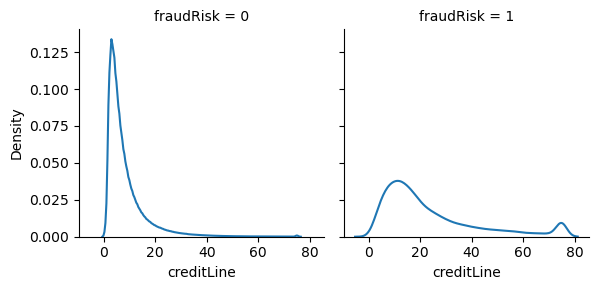

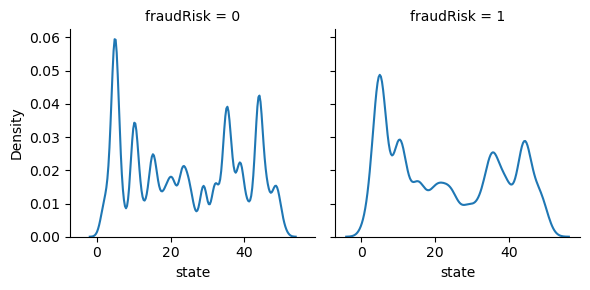

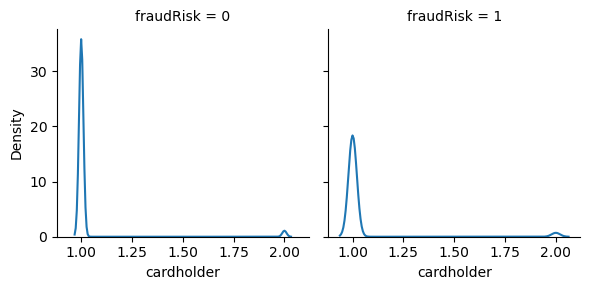

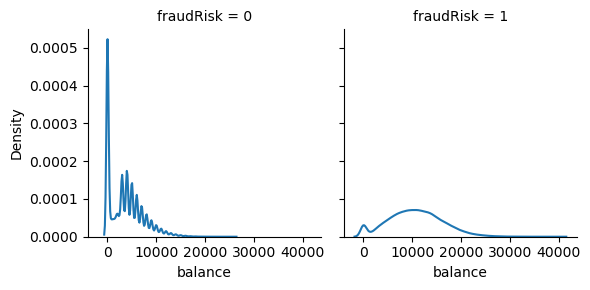

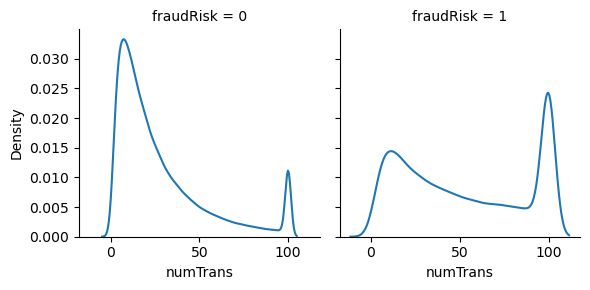

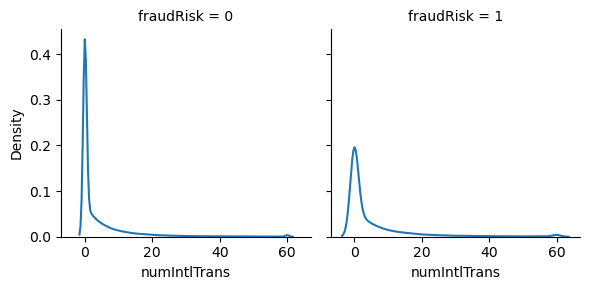

In [4]:
#DATA ANALYSIS
g = sns.FacetGrid(ccdata, col='fraudRisk')
g = g.map(sns.kdeplot, 'creditLine')
g = sns.FacetGrid(ccdata, col='fraudRisk')
g = g.map(sns.kdeplot, 'state')
g = sns.FacetGrid(ccdata, col='fraudRisk')
g = g.map(sns.kdeplot, 'cardholder')
g = sns.FacetGrid(ccdata, col='fraudRisk')
g = g.map(sns.kdeplot, 'balance')
g = sns.FacetGrid(ccdata, col='fraudRisk')
g = g.map(sns.kdeplot, 'numTrans')
g = sns.FacetGrid(ccdata, col='fraudRisk')
g = g.map(sns.kdeplot, 'numIntlTrans')


<AxesSubplot: >

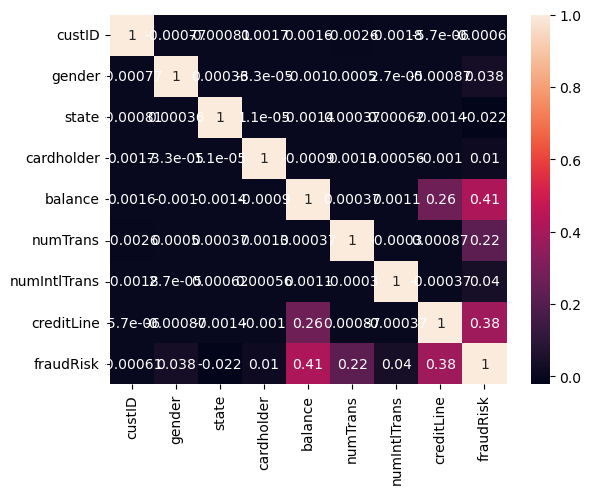

In [5]:
# DATA ANALYSIS 2 : HEATMAP -To understand co-relation 
sns.heatmap(ccdata.corr(), annot=True)

Legal Class 0:  940136
Fraud Class 1:  59864
Ratio:  15.7 :1


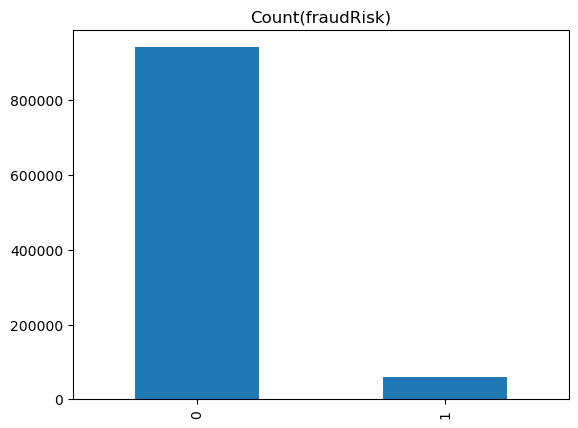

In [6]:
#DATA ANALYSIS 3 : Checking if data is balaced or imbalanced 
targ_cnt=ccdata.fraudRisk.value_counts()
print('Legal Class 0: ',targ_cnt[0])
print('Fraud Class 1: ',targ_cnt[1])
print('Ratio: ',round(targ_cnt[0]/targ_cnt[1],2),':1')
targ_cnt.plot(kind='bar',title='Count(fraudRisk)')
plt.show()

In [7]:
# MODEL MAKING BEGINS - Seperating dependent and independent variables
# Dropping custId column as it autoincrements and no affect on results 
labels = ccdata.columns[1:8]
l1 = ccdata.columns[8]
X = ccdata[labels]
y = ccdata[l1] 
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [8]:
# CLASSIFICATION ALGORITHM 1
g = GaussianNB()
g.fit(X_trn, y_trn.ravel())
ypredg = g.predict(X_tst)

In [9]:
# ALGORITHM 2
# RANDOM FOREST 
rfc = RandomForestClassifier()
rfc.fit(X_trn,y_trn.ravel())
ypredrf = rfc.predict(X_tst)

In [10]:
# CLASSIFICATION ALGORITHM 3
# LINEAR DISCRIMINANT ANALYSIS
lda=LinearDiscriminantAnalysis()
lda.fit(X_trn,y_trn.ravel())
yprb=lda.predict_proba(X_tst)[:,1]
ypredlda=np.where(yprb>0.5,1,0)

In [11]:
# CLASSIFICATION ALGORITHM 4
# QUADRATIC DISCRIMINANT ANALYSIS
qda=QuadraticDiscriminantAnalysis()
qda.fit(X_trn,y_trn.ravel())
yprb1=qda.predict_proba(X_tst)[:,1]
ypredqda=np.where(yprb1>0.5,1,0)

In [12]:
# CLASSIFICATION ALGORITHM 5
# ADA BOOST 
abc = AdaBoostClassifier(n_estimators=20, random_state=0, algorithm='SAMME.R')
abc.fit(X_trn, y_trn) 
 
ypredabc = abc.predict(X_tst)

In [13]:
# ALGORITHM 6
#DECISION TREE [CART]
dtc=tree.DecisionTreeClassifier(criterion='gini',max_depth=3)
dtc.fit(X_trn,y_trn.ravel())
ypreddtc=dtc.predict(X_tst)


In [14]:
# CLASSIFICATION ALGORITHM 7
# LOGISTIC REGRESSION
lr = LogisticRegression() 
lr.fit(X_trn, y_trn.ravel()) 
 
ypredlr = lr.predict(X_tst) 

C:\Users\Hp\anaconda3\envs\opencv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# CM ALGORITHMS
print('Gaussian Naive Bayes')
cmg=confusion_matrix(y_tst,ypredg)
print(cmg)
print('#############################################')
print('Random Forest')
cmr=confusion_matrix(y_tst,ypredrf)
print(cmr)
print('#############################################')
print('Linear Discriminant Analysis')
cml=confusion_matrix(y_tst,ypredlda)
print(cml)
print('#############################################')
print('Quadratic Discriminant Analysis')
cmq=confusion_matrix(y_tst,ypredqda)
print(cmq)
print('#############################################')
print('Ada Boost Algorithm')
cma=confusion_matrix(y_tst,ypredabc)
print(cma)
print('#############################################')
print('Decision Tree Classifier')
cmd=confusion_matrix(y_tst,ypreddtc)
print(cmd)
print('#############################################')
print('Logistic Regression')
cml=confusion_matrix(y_tst,ypredlr)
print(cml)
print('#############################################')


Gaussian Naive Bayes
[[271153  10849]
 [  7974  10024]]
#############################################
Random Forest
[[277907   4095]
 [  9425   8573]]
#############################################
Linear Discriminant Analysis
[[275812   6190]
 [  7796  10202]]
#############################################
Quadratic Discriminant Analysis
[[270510  11492]
 [  7509  10489]]
#############################################
Ada Boost Algorithm
[[278151   3851]
 [  9414   8584]]
#############################################
Decision Tree Classifier
[[278292   3710]
 [ 10854   7144]]
#############################################
Logistic Regression
[[279000   3002]
 [ 15353   2645]]
#############################################


In [16]:
# ACCURACIES AND CLASSIFICATION REPORTS 
print ('GAUSSIAN NAIVE BAYES')
print(classification_report(y_tst, ypredg)) 
ag = accuracy_score(y_tst, ypredg)
print("Accuracy: %.2f%%" % (ag * 100.0))
print 
('#####################################################################')
print ('RANDOM FOREST')
print(classification_report(y_tst, ypredrf)) 
ar = accuracy_score(y_tst, ypredrf)
print("Accuracy: %.2f%%" % (ar * 100))
print 
('#####################################################################')
print ('LINEAR DISCRIMINANT ANALYSIS')
al = accuracy_score(y_tst, ypredlda)
print("Accuracy: %.2f%%" % (al * 100.0))
print(classification_report(y_tst, ypredlda)) 
print 
('#####################################################################')
print ('QUADRATIC DISCRIMINANT ANALYSIS')
aq = accuracy_score(y_tst, ypredqda)
print("Accuracy: %.2f%%" % (aq * 100.0))
print(classification_report(y_tst, ypredqda)) 
print 
('#####################################################################')
print ('ADABOOST CLASSIFIER')
aa = accuracy_score(y_tst, ypredabc)
print("Accuracy: %.2f%%" % (aa * 100.0))
print(classification_report(y_tst, ypredabc)) 
print 
('#####################################################################')
print ('DECISION TREE CLASSIFIER')
ad = accuracy_score(y_tst, ypreddtc)
print("Accuracy: %.2f%%" % (ad * 100.0))
print(classification_report(y_tst, ypreddtc)) 
print 
('#####################################################################')
print ('LOGISTIC REGRESSION')
al = accuracy_score(y_tst, ypredlr)
print("Accuracy: %.2f%%" % (al * 100.0))
print(classification_report(y_tst, ypredlr))
print 
('#####################################################################')

GAUSSIAN NAIVE BAYES
              precision    recall  f1-score   support

           0       0.97      0.96      0.97    282002
           1       0.48      0.56      0.52     17998

    accuracy                           0.94    300000
   macro avg       0.73      0.76      0.74    300000
weighted avg       0.94      0.94      0.94    300000

Accuracy: 93.73%
RANDOM FOREST
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    282002
           1       0.68      0.48      0.56     17998

    accuracy                           0.95    300000
   macro avg       0.82      0.73      0.77    300000
weighted avg       0.95      0.95      0.95    300000

Accuracy: 95.49%
LINEAR DISCRIMINANT ANALYSIS
Accuracy: 95.34%
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    282002
           1       0.62      0.57      0.59     17998

    accuracy                           0.95    300000
   macro avg 

'#####################################################################'

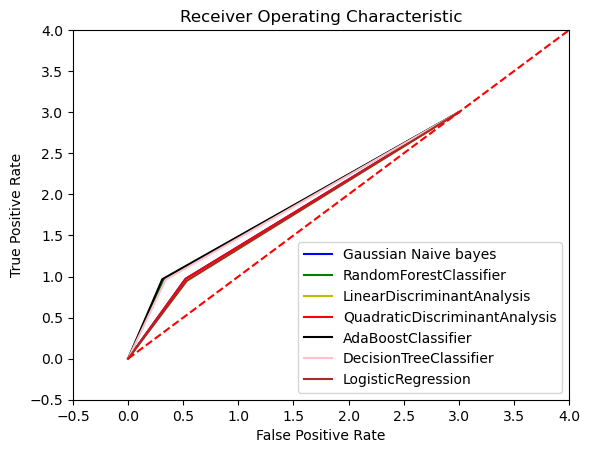

In [17]:
# COMPARATIVE ANALYSIS OF CLASSIFICATION ALGORITHMS BY ROC CHARTS 
TP1 = cmg[0][0]
FP1 = cmg[0][1]
FN1 = cmg[1][0]
TN1 = cmg[1][1]
TP2 = cmr[0][0]
FP2 = cmr[0][1]
FN2 = cmr[1][0]
TN2 = cmr[1][1]
TP3 = cml[0][0]
FP3 = cml[0][1]
FN3 = cml[1][0]
TN3 = cml[1][1]
TP4 = cmq[0][0]
FP4 = cmq[0][1]
FN4 = cmq[1][0]
TN4 = cmq[1][1]
TP5 = cma[0][0]
FP5 = cma[0][1]
FN5 = cma[1][0]
TN5 = cma[1][1]
TP6 = cmd[0][0]
FP6 = cmd[0][1]
FN6 = cmd[1][0]
TN6 = cmd[1][1]
TP7 = cml[0][0]
FP7 = cml[0][1]
FN7 = cml[1][0]
TN7 = cml[1][1]
tpr1 = TP1 / (TP1+FN1)
fpr1 = 1- (TN1 / (TN1+FP1))
tpr2 = TP2 / (TP2+FN2)
fpr2 = 1- (TN2 / (TN2+FP2))
tpr3 = TP3 / (TP3+FN3)
fpr3 = 1- (TN3 / (TN3+FP3))
tpr4 = TP4 / (TP4+FN4)
fpr4 = 1- (TN4 / (TN4+FP4))
tpr5 = TP5 / (TP5+FN5)
fpr5 = 1- (TN5 / (TN5+FP5))
tpr6 = TP6 / (TP6+FN6)
fpr6 = 1- (TN6 / (TN6+FP6))
tpr7 = TP7 / (TP7+FN7)
fpr7 = 1- (TN7 / (TN7+FP7))
plt.title('Receiver Operating Characteristic')
plt.plot([0,fpr1,3],[0, tpr1,3], 'b', label='Gaussian Naive bayes')
plt.plot([0,fpr2,3],[0, tpr2,3], 'g', label='RandomForestClassifier')
plt.plot([0,fpr3,3],[0, tpr3,3], 'y', label='LinearDiscriminantAnalysis')
plt.plot([0,fpr4,3],[0, tpr4,3], 'r', label='QuadraticDiscriminantAnalysis')
plt.plot([0,fpr5,3],[0, tpr5,3], 'black', label='AdaBoostClassifier')
plt.plot([0,fpr6,3],[0, tpr6,3], 'pink', label='DecisionTreeClassifier')
plt.plot([0,fpr7,3],[0, tpr7,3], 'brown', label='LogisticRegression')
plt.legend(loc='lower right')
plt.plot([0,4],[0,4],'r--')
plt.xlim([-0.5,4.0])
plt.ylim([-0.5,4.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [18]:
# BEFORE SAMPLING 
print("Before OverSampling, counts of label '1': {}".format(sum(y_trn == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_trn == 0)))

Before OverSampling, counts of label '1': 41866
Before OverSampling, counts of label '0': 658134 



In [19]:
# SAMPLING ALGORITHM 1

sm = SMOTE(random_state = 2) 
X_trn_res, y_trn_res = sm.fit_resample(X_trn, y_trn.ravel()) 
#ccdata_sm = pd.concat([X_train_res, y_train_res ])
#ccdata_sm.head(5)
# Post sampling 
print(type(X_trn_res))
ccdata_sm = np.concatenate((X_trn_res, y_trn_res[:,None]), axis=1)
ccdata_sm
print('After OverSampling, the shape of train_X: {}'.format(X_trn_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_trn_res.shape)) 
print("After OverSampling, counts of label '1': {}".format(sum(y_trn_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_trn_res == 0)))

<class 'pandas.core.frame.DataFrame'>
After OverSampling, the shape of train_X: (1316268, 7)
After OverSampling, the shape of train_y: (1316268,) 

After OverSampling, counts of label '1': 658134
After OverSampling, counts of label '0': 658134


In [20]:
# COMPARING ALGORITHMS AFTER SMOTE
# GAUSSIAN NAIVE BAYES
g_s = GaussianNB()
g_s.fit(X_trn_res, y_trn_res.ravel())
ypredgnbs = g_s.predict(X_tst)

In [21]:
rf_s = RandomForestClassifier()
rf_s.fit(X_trn_res, y_trn_res.ravel())
ypredrfs = rf_s.predict(X_tst)


In [22]:
# DT 
d_s=tree.DecisionTreeClassifier(criterion='gini',max_depth=3)
d_s.fit(X_trn_res, y_trn_res.ravel())
ypreddtcs=d_s.predict(X_tst)

In [23]:
l_s = LogisticRegression() 
l_s.fit(X_trn_res, y_trn_res.ravel()) 
 
ypredlrs = l_s.predict(X_tst) 

C:\Users\Hp\anaconda3\envs\opencv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
# SAMPLING ALGORITHM 2
# NEAR MISS UNDERSAMPLING 
nr = NearMiss() 
 
X_trn_miss, y_trn_miss = nr.fit_resample(X_trn, y_trn.ravel()) 
 
print('After Undersampling, the shape of train_X: {}'.format(X_trn_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_trn_miss.shape)) 
 
print("After Undersampling, counts of label '1': {}".format(sum(y_trn_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_trn_miss == 0)))

After Undersampling, the shape of train_X: (83732, 7)
After Undersampling, the shape of train_y: (83732,) 

After Undersampling, counts of label '1': 41866
After Undersampling, counts of label '0': 41866


In [25]:
# COMPARING ALGORITHMS AFTER NEAR MISS
# GNB
g_nm = GaussianNB()
g_nm.fit(X_trn_miss, y_trn_miss.ravel())
ypredgnbnm = g_nm.predict(X_tst)

In [26]:
# RANDOM FOREST 
r_nm = RandomForestClassifier()
r_nm.fit(X_trn_miss, y_trn_miss.ravel())
ypredrfnm = r_nm .predict(X_tst)


In [27]:
# DECISION TREE 
d_nm=tree.DecisionTreeClassifier(criterion='gini',max_depth=3)
d_nm.fit(X_trn_miss, y_trn_miss.ravel())
ypreddtcnm=d_nm.predict(X_tst)

In [28]:
# lOGISTIC REGRESSION 
l_nm = LogisticRegression() 
l_nm.fit(X_trn_miss, y_trn_miss.ravel()) 
 
ypredlrnm = l_nm.predict(X_tst)

C:\Users\Hp\anaconda3\envs\opencv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# POST SAMPLING ANALYSIS [SMOTE VS NEAR MISS] 
# COMAPARING ACCURACIES AND CLASSIFICATION REPORTS
print ('I. GAUSSIAN NAIVE BAYES')
print ('Before Sampling : ')
print(classification_report(y_tst, ypredg)) 
print("Accuracy: %.2f%%" % (ag * 100.0))
print ('After Sampling [SMOTE]: ')
cmgs=confusion_matrix(y_tst,ypredgnbs)
print(cmgs)
print(classification_report(y_tst, ypredgnbs)) 
ags = accuracy_score(y_tst, ypredgnbs)
print("Accuracy: %.2f%%" % (ags * 100.0))
print('After Sampling [NEAR MISS]: ')
cmgn=confusion_matrix(y_tst,ypredgnbnm)
print(cmgn)
print(classification_report(y_tst, ypredgnbnm)) 
agn = accuracy_score(y_tst, ypredgnbnm)
print("Accuracy: %.2f%%" % (agn * 100.0))
print ('#####################################################################')
print ('II. RANDOM FOREST ')
print ('Before Sampling : ')
print(classification_report(y_tst, ypredrf)) 
print("Accuracy: %.2f%%" % (ar * 100))
print ('After Sampling [SMOTE]: ')
cmrs=confusion_matrix(y_tst,ypredrfs)
print(cmrs)
print(classification_report(y_tst, ypredrfs)) 
ars = accuracy_score(y_tst, ypredrfs)
print("Accuracy: %.2f%%" % (ars* 100))
print('After Sampling [NEAR MISS]: ')
cmrn =confusion_matrix(y_tst,ypredrfnm )
print(cmrn )
print(classification_report(y_tst, ypredrfnm )) 
arn = accuracy_score(y_tst, ypredrfnm )
print("Accuracy: %.2f%%" % (arn * 100))
print ('#####################################################################')
print ('III. DECISION TREE ')
print ('Before Sampling : ')
print("Accuracy: %.2f%%" % (ad * 100.0))
print(classification_report(y_tst, ypreddtc)) 
print ('After Sampling [SMOTE]: ')
cmds=confusion_matrix(y_tst,ypreddtcs)
print(cmds)
ads = accuracy_score(y_tst, ypreddtcs)
print("Accuracy: %.2f%%" % (ads * 100.0))
print(classification_report(y_tst, ypreddtcs))
print('After Sampling [NEAR MISS]: ')
cmdn=confusion_matrix(y_tst,ypreddtcnm)
print(cmdn)
adn = accuracy_score(y_tst, ypreddtcnm)
print("Accuracy: %.2f%%" % (adn * 100.0))
print(classification_report(y_tst, ypreddtcnm)) 
print('#####################################################################')
print ('IV. LOGISTIC REGRESSION ')
print ('Before Sampling : ')
print("Accuracy: %.2f%%" % (al * 100.0))
print(classification_report(y_tst, ypredlr))
print ('After Sampling [SMOTE]: ')
cmls=confusion_matrix(y_tst,ypredlrs)
print(cmls)
als = accuracy_score(y_tst, ypredlrs)
print("Accuracy: %.2f%%" % (als * 100.0))
print(classification_report(y_tst, ypredlrs))
print('After Sampling [NEAR MISS]: ')
cmln=confusion_matrix(y_tst,ypredlrnm)
print(cmln)
aln= accuracy_score(y_tst, ypredlrnm)
print("Accuracy: %.2f%%" % (aln* 100.0))
print(classification_report(y_tst, ypredlrnm)) 
print('#####################################################################')

I. GAUSSIAN NAIVE BAYES
Before Sampling : 
              precision    recall  f1-score   support

           0       0.97      0.96      0.97    282002
           1       0.48      0.56      0.52     17998

    accuracy                           0.94    300000
   macro avg       0.73      0.76      0.74    300000
weighted avg       0.94      0.94      0.94    300000

Accuracy: 93.73%
After Sampling [SMOTE]: 
[[241801  40201]
 [  2658  15340]]
              precision    recall  f1-score   support

           0       0.99      0.86      0.92    282002
           1       0.28      0.85      0.42     17998

    accuracy                           0.86    300000
   macro avg       0.63      0.85      0.67    300000
weighted avg       0.95      0.86      0.89    300000

Accuracy: 85.71%
After Sampling [NEAR MISS]: 
[[208809  73193]
 [  5939  12059]]
              precision    recall  f1-score   support

           0       0.97      0.74      0.84    282002
           1       0.14      0.67   

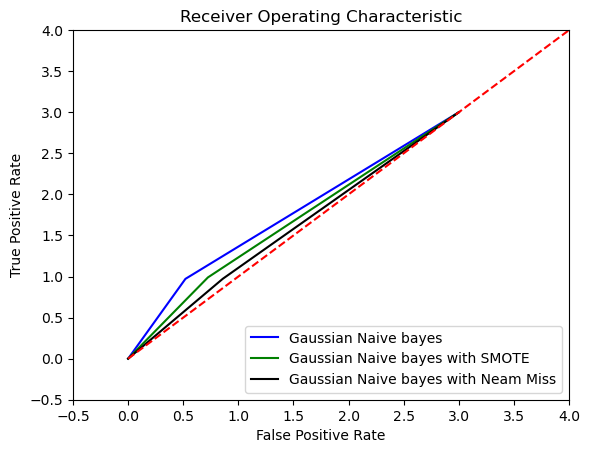

In [30]:
# GAUSSIAN NAIVE BAYES
TP1 = cmg[0][0]
FP1 = cmg[0][1]
FN1 = cmg[1][0]
TN1 = cmg[1][1]
TP1s = cmgs[0][0]
FP1s= cmgs[0][1]
FN1s = cmgs[1][0]
TN1s = cmgs[1][1]
TP1nm = cmgn[0][0]
FP1nm = cmgn[0][1]
FN1nm = cmgn[1][0]
TN1nm = cmgn[1][1]
tpr1 = TP1 / (TP1+FN1)
fpr1 = 1- (TN1 / (TN1+FP1))
tpr1s = TP1s / (TP1s+FN1s)
fpr1s = 1- (TN1s / (TN1s+FP1s))
tpr1n = TP1nm / (TP1nm+FN1nm)
fpr1n = 1- (TN1nm / (TN1nm+FP1nm))
plt.title('Receiver Operating Characteristic')
plt.plot([0,fpr1,3],[0, tpr1,3], 'b', label='Gaussian Naive bayes')
plt.plot([0,fpr1s,3],[0, tpr1s,3], 'g', label='Gaussian Naive bayes with SMOTE')
plt.plot([0,fpr1n,3],[0, tpr1n,3], 'black', label='Gaussian Naive bayes with Neam Miss')
plt.legend(loc='lower right')
plt.plot([0,4],[0,4],'r--')
plt.xlim([-0.5,4.0])
plt.ylim([-0.5,4.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


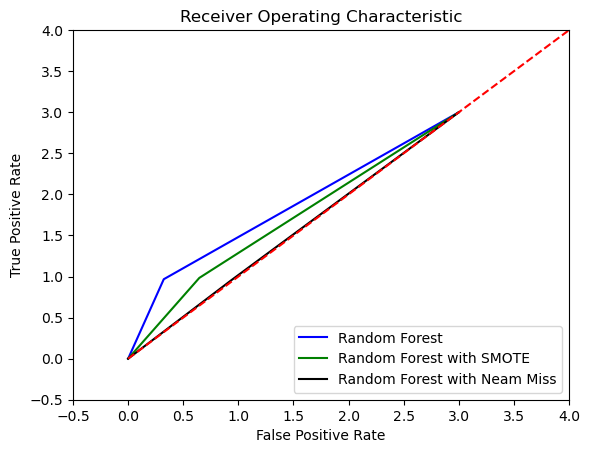

In [31]:
TP2 = cmr[0][0]
FP2 = cmr[0][1]
FN2 = cmr[1][0]
TN2 = cmr[1][1]
TP2s = cmrs[0][0]
FP2s= cmrs[0][1]
FN2s = cmrs[1][0]
TN2s = cmrs[1][1]
TP2nm = cmrn[0][0]
FP2nm = cmrn[0][1]
FN2nm = cmrn[1][0]
TN2nm = cmrn[1][1]
tpr2 = TP2 / (TP2+FN2)
fpr2 = 1- (TN2 / (TN2+FP2))
tpr2s = TP2s / (TP2s+FN2s)
fpr2s = 1- (TN2s / (TN2s+FP2s))
tpr2n = TP2nm / (TP2nm+FN2nm)
fpr2n = 1- (TN2nm / (TN2nm+FP2nm))
plt.title('Receiver Operating Characteristic')
plt.plot([0,fpr2,3],[0, tpr2,3], 'b', label='Random Forest')
plt.plot([0,fpr2s,3],[0, tpr2s,3], 'g', label='Random Forest with SMOTE')
plt.plot([0,fpr2n,3],[0, tpr2n,3], 'black', label='Random Forest with Neam Miss')
plt.legend(loc='lower right')
plt.plot([0,4],[0,4],'r--')
plt.xlim([-0.5,4.0])
plt.ylim([-0.5,4.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

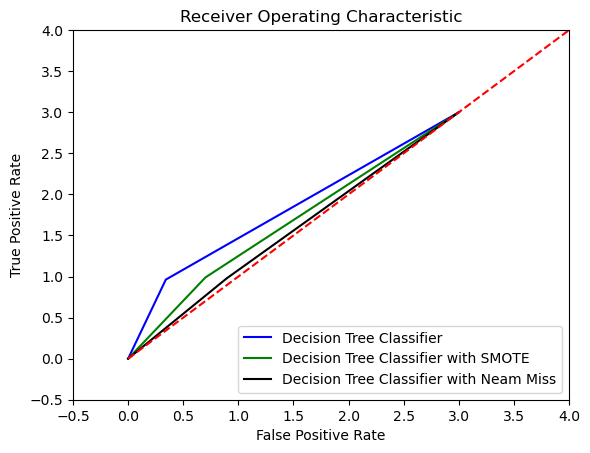

In [32]:
TP6 = cmd[0][0]
FP6 = cmd[0][1]
FN6 = cmd[1][0]
TN6 = cmd[1][1]
TP6s = cmds[0][0]
FP6s= cmds[0][1]
FN6s = cmds[1][0]
TN6s = cmds[1][1]
TP6nm = cmdn[0][0]
FP6nm = cmdn[0][1]
FN6nm = cmdn[1][0]
TN6nm = cmdn[1][1]
tpr6 = TP6 / (TP6+FN6)
fpr6 = 1- (TN6 / (TN6+FP6))
tpr6s = TP6s / (TP6s+FN6s)
fpr6s = 1- (TN6s / (TN6s+FP6s))
tpr6n = TP6nm / (TP6nm+FN6nm)
fpr6n = 1- (TN6nm / (TN6nm+FP6nm))
plt.title('Receiver Operating Characteristic')
plt.plot([0,fpr6,3],[0, tpr6,3], 'b', label='Decision Tree Classifier')
plt.plot([0,fpr6s,3],[0, tpr6s,3], 'g', label='Decision Tree Classifier with SMOTE')
plt.plot([0,fpr6n,3],[0, tpr6n,3], 'black', label='Decision Tree Classifier with Neam Miss')
plt.legend(loc='lower right')
plt.plot([0,4],[0,4],'r--')
plt.xlim([-0.5,4.0])
plt.ylim([-0.5,4.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

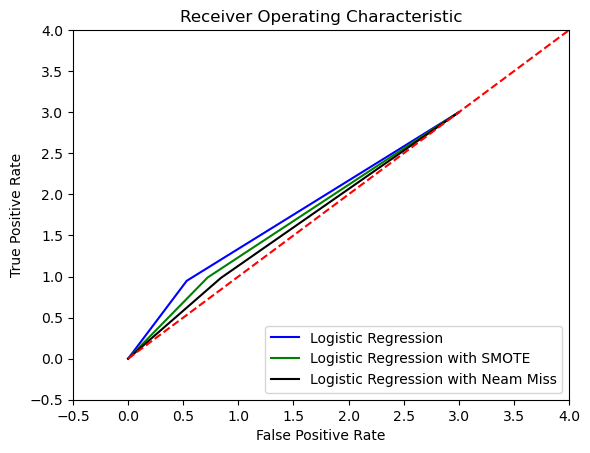

In [33]:
TP7 = cml[0][0]
FP7 = cml[0][1]
FN7 = cml[1][0]
TN7 = cml[1][1]
TP7s = cmls[0][0]
FP7s= cmls[0][1]
FN7s = cmls[1][0]
TN7s = cmls[1][1]
TP7nm = cmln[0][0]
FP7nm = cmln[0][1]
FN7nm = cmln[1][0]
TN7nm = cmln[1][1]
tpr7 = TP7 / (TP7+FN7)
fpr7 = 1- (TN7 / (TN7+FP7))
tpr7s = TP7s / (TP7s+FN7s)
fpr7s = 1- (TN7s / (TN7s+FP7s))
tpr7n = TP7nm / (TP7nm+FN7nm)
fpr7n = 1- (TN7nm / (TN7nm+FP7nm))
plt.title('Receiver Operating Characteristic')
plt.plot([0,fpr7,3],[0, tpr7,3], 'b', label='Logistic Regression')
plt.plot([0,fpr7s,3],[0, tpr7s,3], 'g', label='Logistic Regression with SMOTE')
plt.plot([0,fpr7n,3],[0, tpr7n,3], 'black', label='Logistic Regression with Neam Miss')
plt.legend(loc='lower right')
plt.plot([0,4],[0,4],'r--')
plt.xlim([-0.5,4.0])
plt.ylim([-0.5,4.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

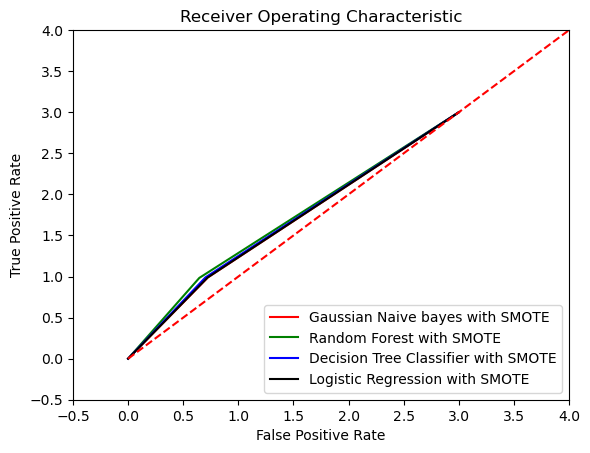

In [34]:
plt.title('Receiver Operating Characteristic')
plt.plot([0,fpr1s,3],[0, tpr1s,3], 'r', label='Gaussian Naive bayes with SMOTE')
plt.plot([0,fpr2s,3],[0, tpr2s,3], 'g', label='Random Forest with SMOTE')
plt.plot([0,fpr6s,3],[0, tpr6s,3], 'b', label='Decision Tree Classifier with SMOTE')
plt.plot([0,fpr7s,3],[0, tpr7s,3], 'black', label='Logistic Regression with SMOTE')
plt.legend(loc='lower right')
plt.plot([0,4],[0,4],'r--')
plt.xlim([-0.5,4.0])
plt.ylim([-0.5,4.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()